In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.chdir("/content/gdrive/My Drive/6751group")

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/gdrive/My Drive/6751group'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/gdrive/My Drive/6751group/tt1.csv
/content/gdrive/My Drive/6751group/hate_speech_2.ipynb
/content/gdrive/My Drive/6751group/test_nolabel.csv
/content/gdrive/My Drive/6751group/train.csv
/content/gdrive/My Drive/6751group/tt0.csv


In [ ]:
train = pd.read_csv('train.csv')


In [ ]:

#for i in range(0, 2):
  #save_data = train.iloc[i*43144  : (i+1)*43144]
  #file_name = r'tt' + str(i) + '.csv'
  #save_data.to_csv(file_name, index=False)  





In [ ]:
train = pd.read_csv('tt0.csv')
test_1 = pd.read_csv('tt1.csv')

In [ ]:
#test = test.drop(['label'], axis = 1)
#test.to_csv('test_nolabel.csv',index=False)
test = pd.read_csv('test_nolabel.csv')

In [ ]:
train.head()

,id,label,tweet
0,1,1,@tinyboatclub you just started a whole other s...
1,2,1,Blah blah Idgaf bout you crazy ass bitch
2,3,0,hour from 5-6pm! only at ibar from monday to ...
3,4,0,@user kind of says it all !!!
4,5,1,Yung nigger move that dope


In [ ]:
test.head()

,id,tweet
0,43145,"@user jesus, thank you for everything. ð ..."
1,43146,@user what are you about today? #celebrate ...
2,43147,i am thankful for sunshine. #thankful #positiv...
3,43148,I can't believe these ghetto fucks left this l...
4,43149,"my son loves the comfo of his #ribcap, he even..."


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

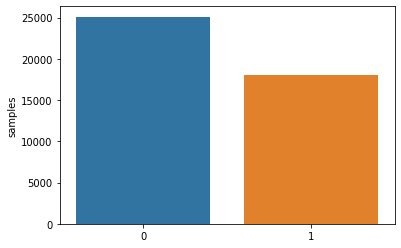

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x=train.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

In [ ]:
def create_corpus():
    corpus=[]
    
    for x in train['tweet'].str.split():
      for i in x:
          corpus.append(i)
    return corpus

In [ ]:
def create_corpus_2():
    corpus_2=[]
    
    for x in test['tweet'].str.split():
      for i in x:
          corpus_2.append(i)
    return corpus_2

In [ ]:
from string import punctuation
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<BarContainer object of 10 artists>

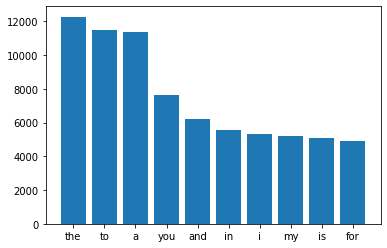

In [ ]:
#train
from collections import defaultdict
import matplotlib.pyplot as plt

corpus=create_corpus()

dic=defaultdict(int)
stop=set(stopwords.words('english'))
for word in corpus:
    if word in stop:
        dic[word]+=1
print(corpus)        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

['@user', 'jesus,', 'thank', 'you', 'for', 'everything.', 'ð\x9f\x98\x80', '#blessed', 'ð\x9f\x98\x8a', '#skyvalentine', 'â\x9d¤ï¸\x8fð\x9f\x92\x96â\x98ºï¸\x8fð\x9f\x98\x80', '@user', 'what', 'are', 'you', 'about', 'today?', '#celebrate', '#lulybtips', '#affirmations', 'i', 'am', 'thankful', 'for', 'sunshine.', '#thankful', '#positive', 'I', "can't", 'believe', 'these', 'ghetto', 'fucks', 'left', 'this', 'little', 'kid', 'next', 'to', 'me.', "He's", 'now', 'playing', 'with', 'fucking', 'everything.', 'Odds', 'of', 'his', 'survival?', 'Minimal.', 'my', 'son', 'loves', 'the', 'comfo', 'of', 'his', '#ribcap,', 'he', 'even', 'wears', 'it', 'when', 'he', 'goes', 'to', 'sleep!', 'thank', 'you,', 'jeanette,', 'for', 'this', '#review', '!', '#feedback', "i'm", 'leaving', 'happy.', 'it', 'may', 'not', 'sound', 'like', 'i', 'am.', 'zimmer', "didn't", 'leave', 'happy.', 'in', 'that', 'sense', "it's", 'much...', '@ShainaRakia', 'doubt', 'it', 'cause', 'a', 'bitch', 'aint', 'nothing', 'but', 'a', '

<BarContainer object of 10 artists>

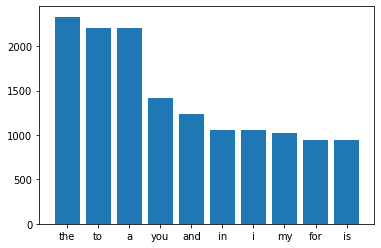

In [ ]:
#test
from collections import defaultdict
corpus_2=create_corpus_2()

dic=defaultdict(int)
stop=set(stopwords.words('english'))
for word in corpus_2:
    if word in stop:
        dic[word]+=1
print(corpus_2)        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 30 artists>

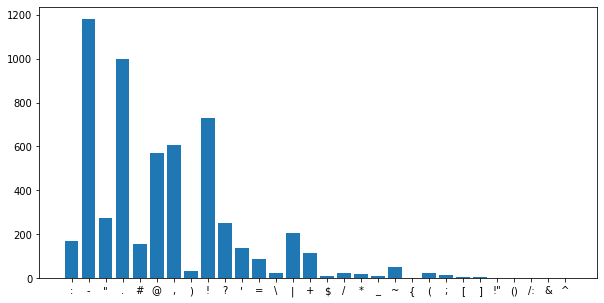

In [ ]:
#train data
plt.figure(figsize=(10,5))
corpus=create_corpus()

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 28 artists>

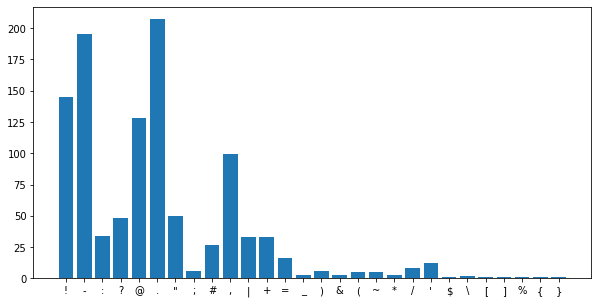

In [ ]:
#test data
plt.figure(figsize=(10,5))
corpus_2=create_corpus_2()

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus_2):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

In [ ]:
tweets = train['tweet'].values
labels = train['label'].values
test_input = test['tweet'].values
test_label = list()

In [ ]:
import string
import nltk

In [ ]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

train['tweet']=train['tweet'].apply(lambda x : remove_punct(x))
test['tweet']=test['tweet'].apply(lambda x : remove_punct(x))

In [ ]:
train.head()

,id,label,tweet
0,1,1,tinyboatclub you just started a whole other si...
1,2,1,Blah blah Idgaf bout you crazy ass bitch
2,3,0,hour from 56pm only at ibar from monday to th...
3,4,0,user kind of says it all
4,5,1,Yung nigger move that dope


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
def preprocess(text):
    all_tweets = list()

    # Lammatizing
    nltk.download('wordnet')
    #lamatizer = WordNetLemmatizer()
    
    for txt in text:
        lower_case = txt.lower()
        clean_word = lower_case.replace('[^\s\w]','')  
        clean_word = re.sub(r'\*?', '', clean_word)
        clean_word = re.sub(r'^rt', '', clean_word)
        clean_word = re.sub('[^a-zA-Z0-9]','',clean_word)
        tokens = word_tokenize(clean_word)
        #print(tokens)
        wnl = nltk.WordNetLemmatizer()
        words = [wnl.lemmatize(t) for t in tokens]
        #words = clean_word.split()
        formatted_test = list()
        for word in words:
            if word not in stopwords.words("english"):
                formatted_test.append(word)
        formatted = " ".join(formatted_test)
        punct_text = "".join([ch for ch in formatted if ch not in punctuation])
        all_tweets.append(punct_text)
    for i in range(len(all_tweets)):
      all_tweets[i] = all_tweets[i].replace("user", '')
      all_tweets[i] = re.sub('^ ','',all_tweets[i])
    all_text = " ".join(all_tweets)
    all_words = all_text.split()
    
    return all_tweets, all_words


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
all_tweets, all_words = preprocess(tweets)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
all_tweets

['tinyboatclub started whole situation dumb asa cunt',
 'blah blah idgaf bout crazy bitch',
 'hour 56pm ibar monday thursday ibar special hour',
 'kind say',
 'yung nigger move dope',
 'photo placemat gbp 1499 get shop cool home fun',
 'grateful fun makeup lipstick hellokitty doin red reflection mad',
 'danusaur goldenarmada dont love hoe',
 'lizeth0714 nc weather seriously fucken retarded gon na 40 something today almost 80 saturday',
 'low ridiculously excited euro 2016 opener spos 2016 euro opener',
 'fathersday gift proud dadsavailable 1 day',
 'enjoying loveit',
 'disney adventure disneyland disneyadventures fairytale romance love',
 'well dayum rt tristine214 seen bitch knocking censor tag clothes patio hammer httptcotwe3vy0bk5',
 'whole world control young ripchristinagrimmie',
 'allahsoil culture like horizonalways view never reach',
 'good see weekendyay weekend',
 '17 august',
 ' mate try addressing argument rather trolling staups rude',
 'sad year ripantonyelchin rip antonye

In [ ]:
all_words

['tinyboatclub',
 'started',
 'whole',
 'situation',
 'dumb',
 'asa',
 'cunt',
 'blah',
 'blah',
 'idgaf',
 'bout',
 'crazy',
 'bitch',
 'hour',
 '56pm',
 'ibar',
 'monday',
 'thursday',
 'ibar',
 'special',
 'hour',
 'kind',
 'say',
 'yung',
 'nigger',
 'move',
 'dope',
 'photo',
 'placemat',
 'gbp',
 '1499',
 'get',
 'shop',
 'cool',
 'home',
 'fun',
 'grateful',
 'fun',
 'makeup',
 'lipstick',
 'hellokitty',
 'doin',
 'red',
 'reflection',
 'mad',
 'danusaur',
 'goldenarmada',
 'dont',
 'love',
 'hoe',
 'lizeth0714',
 'nc',
 'weather',
 'seriously',
 'fucken',
 'retarded',
 'gon',
 'na',
 '40',
 'something',
 'today',
 'almost',
 '80',
 'saturday',
 'low',
 'ridiculously',
 'excited',
 'euro',
 '2016',
 'opener',
 'spos',
 '2016',
 'euro',
 'opener',
 'fathersday',
 'gift',
 'proud',
 'dadsavailable',
 '1',
 'day',
 'enjoying',
 'loveit',
 'disney',
 'adventure',
 'disneyland',
 'disneyadventures',
 'fairytale',
 'romance',
 'love',
 'well',
 'dayum',
 'rt',
 'tristine214',
 'seen',

In [ ]:
def create_corpus_1():
    corpus_1=[]
    
    for x in all_words:
      corpus_1.append(x)
    return corpus_1

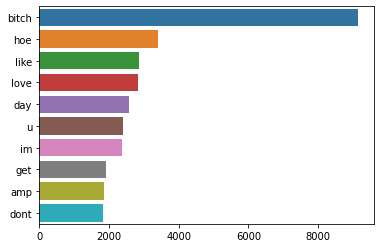

In [ ]:
#train data after preprocess
from collections import Counter
import seaborn as sns
corpus_1=create_corpus_1()
counter=Counter(corpus_1)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

In [ ]:
all_tweets[6]

'grateful fun makeup lipstick hellokitty doin red reflection mad'

In [ ]:
from collections import Counter

word_counts = Counter(all_words)#Counter({'pear': 2, 'apple': 1})出现一个计数的字典
word_list = sorted(word_counts, reverse = True)#reverse = True 降序
word2int = {word : i+1 for (i, word) in enumerate(word_list)}#{'zzzzzzzz': 1, 'zzzentropy': 2, 'zzz': 3, 'zzachbarness': 4}
int2word = {i : word for word, i in word2int.items()}

encoded_tweets = [[word2int[word] for word in tweet.split()] for tweet in all_tweets]

In [ ]:
#Getting rid of short reviews
encoded_labels = np.array([label for idx, label in enumerate(labels) if len(encoded_tweets[idx]) > 0])
encoded_tweets = [tweet for tweet in encoded_tweets if len(tweet) > 0]

In [ ]:
#Padding the sequences (making the length of all tweets the same)
def pad_tweet(encoded_tweets, tweet_length):
    Tweets = []
    
    for tweet in encoded_tweets:
        if len(tweet) >= tweet_length:
            Tweets.append(tweet[:tweet_length])
        else:
            Tweets.append([0] * (tweet_length - len(tweet)) + tweet)
    return np.array(Tweets)

In [ ]:
padded_reviews = pad_tweet(encoded_tweets, 15)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
train_ratio = 0.9
valid_ratio = 0.1
total = padded_reviews.shape[0]
train_cutoff = int(total * train_ratio)

x_train, y_train = padded_reviews[:train_cutoff], encoded_labels[:train_cutoff]
x_valid, y_valid = padded_reviews[train_cutoff:], encoded_labels[train_cutoff:]


from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_valid), torch.from_numpy(y_valid))

batch_size = 32

train_loader = DataLoader(train_data, batch_size, shuffle = True, drop_last = True)
valid_loader = DataLoader(valid_data, batch_size, shuffle = True, drop_last = True)

In [ ]:
class sentimentLSTM(nn.Module):
    def __init__(self, input_size, embedding_dim, hidden_size, output_size, n_layers, drop_prob = 0.3):
        super().__init__()
        self.input_size = input_size
        self.embedding_dim = embedding_dim
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.embed = nn.Embedding(input_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_size, n_layers, batch_first = True, dropout = drop_prob)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sig = nn.Sigmoid()
        
    def forward(self, input_words, h):
        #Input dimension = batch_size x tweet_length
        batch_size = input_words.shape[0]#shape[0]is reading the first dimension of length of the matrix 就是读取矩阵第一维度的长度
        embedd = self.embed(input_words) #dimension = batch_size x tweet_length x embedding_dim
        
        lstm_out, h = self.lstm(embedd, h) #dimension = batch_size x tweet_length x hidden_size
        lstm_out = self.dropout(lstm_out)
        #stacking up the lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_size) #dimension = (batch_size * tweet_length) x hidden_size
        #ensure it's a contiguous tensor
        #确保他是一个连续的tensor，reshape成几行不知道用-1，但是要self.hidden_size列
        fc_out = self.fc(lstm_out) #dimension = (batch_size * tweet_length) x output_size
        
        sig_out = self.sig(fc_out) #dimension = (batch_size * tweet_length) x output_size
        sig_out = sig_out.view(batch_size, -1) #dimension = batch_size x (tweet_length * output_size)
        sig_out = sig_out[:, -1] #Extract only the last output of the element of each example in the batch
        
        
        return sig_out, h


    
    def init_hidden(self, batch_size):
        weights = next(self.parameters()).data
        
        h = (weights.new(self.n_layers, batch_size, self.hidden_size).zero_(),
             weights.new(self.n_layers, batch_size, self.hidden_size).zero_())
        
        return h

In [ ]:
input_size = len(word2int)+1
embedding_dim = 400
hidden_size = 256
output_size = 1
n_layers = 2

In [ ]:
model = sentimentLSTM(input_size, embedding_dim, hidden_size, output_size, n_layers)

In [ ]:
model

sentimentLSTM(
  (embed): Embedding(54703, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.BCELoss()

In [ ]:
print_every = 100
step = 0
n_epochs = 5
clip = 5
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_losses = []

if torch.cuda.is_available():
    model.cuda()

training_loss = []
validation_loss = []

model.train()
for epoch in range(1, n_epochs+1):
    h = model.init_hidden(batch_size)
    
    for inputs, labels in train_loader:
        step += 1
        inputs, labels = inputs.to(device), labels.to(device)
        
        h = tuple([each.data for each in h]) 
        
        model.zero_grad()
        output, h = model(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        
        if step % print_every == 0:
            #Validation
            valid_losses = []
            valid_h = model.init_hidden(batch_size)
            model.eval()
            
            for valid_inputs, valid_labels in valid_loader:
                valid_inputs, valid_labels = valid_inputs.to(device), valid_labels.to(device)
                
                valid_h = tuple([each.data for each in valid_h])
                
                valid_output, valid_h = model(valid_inputs, valid_h)
                valid_loss = criterion(valid_output.squeeze(), valid_labels.float())
                valid_losses.append(valid_loss.item())
                train_losses.append(loss.item())
            training_loss.append(loss.item())
            validation_loss.append(np.mean(valid_losses))  
            print("Epoch: {}/{}".format((epoch), n_epochs),
                  "Step: {}".format(step),
                  "Training Loss: {:.4f}".format(loss.item()),
                  "Validation Loss: {:.4f}".format(np.mean(valid_losses)))

            model.train()

Epoch: 1/5 Step: 100 Training Loss: 0.3902 Validation Loss: 0.3098
Epoch: 1/5 Step: 200 Training Loss: 0.3157 Validation Loss: 0.2304
Epoch: 1/5 Step: 300 Training Loss: 0.2383 Validation Loss: 0.1799
Epoch: 1/5 Step: 400 Training Loss: 0.1249 Validation Loss: 0.1639
Epoch: 1/5 Step: 500 Training Loss: 0.0996 Validation Loss: 0.1456
Epoch: 1/5 Step: 600 Training Loss: 0.2665 Validation Loss: 0.1472
Epoch: 1/5 Step: 700 Training Loss: 0.0950 Validation Loss: 0.1441
Epoch: 1/5 Step: 800 Training Loss: 0.0732 Validation Loss: 0.1323
Epoch: 1/5 Step: 900 Training Loss: 0.1311 Validation Loss: 0.1333
Epoch: 1/5 Step: 1000 Training Loss: 0.1010 Validation Loss: 0.1315
Epoch: 1/5 Step: 1100 Training Loss: 0.1207 Validation Loss: 0.1300
Epoch: 1/5 Step: 1200 Training Loss: 0.1824 Validation Loss: 0.1266
Epoch: 2/5 Step: 1300 Training Loss: 0.0238 Validation Loss: 0.1418
Epoch: 2/5 Step: 1400 Training Loss: 0.1040 Validation Loss: 0.1438
Epoch: 2/5 Step: 1500 Training Loss: 0.0527 Validation Lo

In [ ]:
print(training_loss)
print(validation_loss)

[0.3901561200618744, 0.3157433867454529, 0.23829993605613708, 0.12490101903676987, 0.09959623962640762, 0.26654696464538574, 0.09503159672021866, 0.0731620267033577, 0.1311447024345398, 0.10098358243703842, 0.12065813690423965, 0.18239694833755493, 0.023778997361660004, 0.10402801632881165, 0.052747808396816254, 0.1303749978542328, 0.058668408542871475, 0.05295503884553909, 0.16637763381004333, 0.2608802616596222, 0.4341212213039398, 0.04114031791687012, 0.05745531991124153, 0.25223666429519653, 0.06875841319561005, 0.026216953992843628, 0.01603921689093113, 0.06954526156187057, 0.045121803879737854, 0.015906091779470444, 0.020193850621581078, 0.037656962871551514, 0.21278858184814453, 0.010407979600131512, 0.030392982065677643, 0.012833395972847939, 0.01192957628518343, 0.014506559818983078, 0.28667208552360535, 0.0024010292254388332, 0.19585523009300232, 0.10815978050231934, 0.007910861633718014, 0.01887519285082817, 0.06493981182575226, 0.025248579680919647, 0.09721632301807404, 0.0

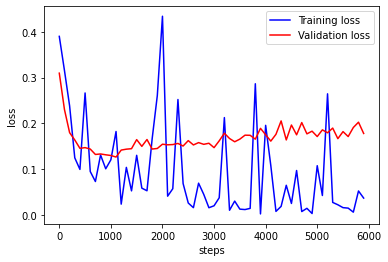

In [ ]:
import matplotlib.pyplot as plt
x = ([i for i in range(0,6000,100)])
y1 = ([i for i in training_loss])
y2 = ([i for i in validation_loss])
plt.plot(x,y1, 'b', label='Training loss')
plt.plot(x,y2, 'r', label='Validation loss')
plt.xlabel('steps')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
test_tweets = test['tweet']
test_tweets, test_words = preprocess(test_tweets)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
for i in range(len(test_tweets)):
    test_tweets[i] = re.sub('[^a-zA-Z0-9]', ' ', test_tweets[i])

test_words = []
for sentence in test_tweets:
    for word in sentence.split():
        test_words.append(word)

In [ ]:
encoded_test_tweets = []
for tweet in test_tweets:
    encoded_tweet = []
    for word in tweet.split():
        if word not in word2int.keys():
            encoded_tweet.append(0)
        else:
            encoded_tweet.append(word2int[word])
    encoded_test_tweets.append(encoded_tweet)

In [ ]:
padded_test_tweets = pad_tweet(encoded_test_tweets, 15)

In [ ]:
def test_model(test_input):
    output_list = list()
    model.eval()
    with torch.no_grad():
        for tweet in test_input:
            feature_tensor = torch.from_numpy(tweet).view(1, -1)
            if(torch.cuda.is_available()):
                feature_tensor = feature_tensor.cuda()
            batch_size = feature_tensor.size(0)
            #initialize hidden state
            h = model.init_hidden(batch_size)
            #get the output from the model
            output, h = model(feature_tensor, h)
            pred = torch.round(output.squeeze())
            output_list.append(pred)
        test_labels = [int(i.data.cpu().numpy()) for i in output_list]
        return test_labels

In [ ]:
test_labels = test_model(padded_test_tweets)

In [ ]:
output = pd.DataFrame()
output['id'] = test['id']
output['label'] = test_labels
output['tweet'] = test_tweets

In [ ]:
output

,id,label,tweet
0,43145,0,jesus thank everything blessed skyvalentine
1,43146,0,today celebrate lulybtips affirmation
2,43147,0,thankful sunshine thankful positive
3,43148,1,cant believe ghetto fuck left little kid next ...
4,43149,0,son love comfo ribcap even wear go sleep thank...
...,...,...,...
7994,51139,1,nicca still tired last night wtf
7995,51140,0,credit instagram ha ahntrio ever seen mom loo...
7996,51141,0,year attack bull chase leave lot despite fact ...
7997,51142,0,life horse much fun would life without horse h...


In [ ]:
print(test_labels)
print(len(test_labels))

[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 

In [ ]:
a = []
t_labels = test_1['label'].values
for i in t_labels:
  a.append(i)
print(a)
print(len(a))

[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 

In [ ]:
count = 0
for i in range(len(a)):
  if test_labels[i] == a [i]:
    count += 1


accu = count / len(a)
print('The accuracy is ', accu)

The accuracy is  0.9451181397674709


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

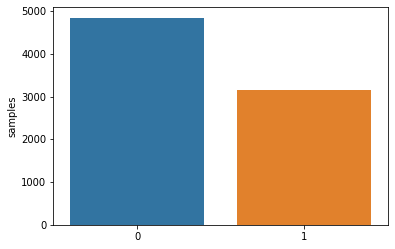

In [ ]:
x=output.label.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

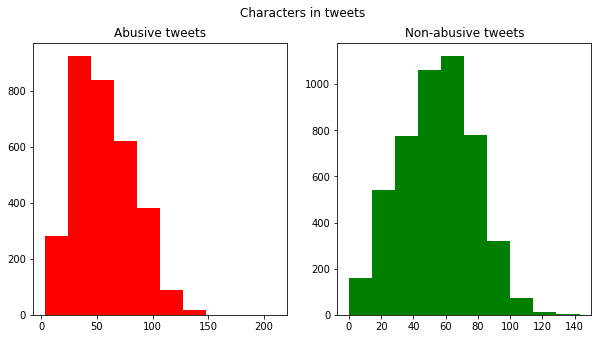

In [ ]:
# the x axis is characters in a tweet, y-axis is how many tweets in those specific character numbers
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=output[output['label']==1]['tweet'].str.len()
ax1.hist(tweet_len,color='red')

ax1.set_title('Abusive tweets')
tweet_len=output[output['label']==0]['tweet'].str.len()
ax2.hist(tweet_len,color='green')

ax2.set_title('Non-abusive tweets')
fig.suptitle('Characters in tweets')
plt.show()

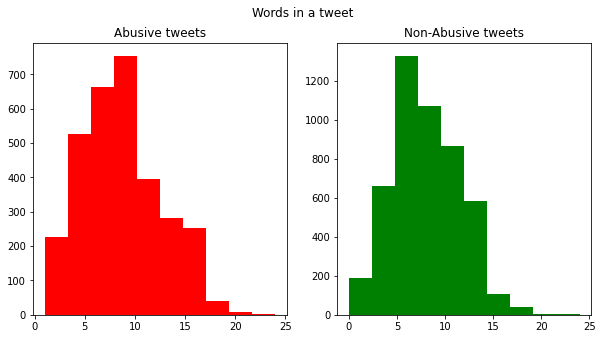

In [ ]:
# the x axis is word in a tweet, y-axis is how many tweets in those specific word numbers
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=output[output['label']==1]['tweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('Abusive tweets')
tweet_len=output[output['label']==0]['tweet'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Non-Abusive tweets')
fig.suptitle('Words in a tweet')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each tweet')

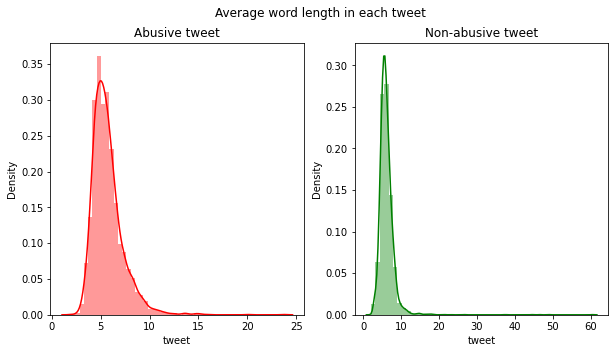

In [ ]:
#test data
#Average word length in a tweet
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=output[output['label']==1]['tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Abusive tweet')
word=output[output['label']==0]['tweet'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Non-abusive tweet')
fig.suptitle('Average word length in each tweet')